### Importing Pandas and other necessary libaray

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Clean StudentPerformace DataFile

In [2]:
df=pd.read_csv('StudentsPerformance_clean.csv')
df.head()

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_mapped,...,test preparation course_mapped,gender_mapped,total_score,pass/fail,grade,math_pass/fail,reading_pass/fail,writing_pass/fail,pass/fail_mapped,grade_mapped
0,0,female,group B,bachelor's degree,standard,none,72,72,74,2,...,0,1,218,Pass,First,1,1,1,1,2
1,1,female,group C,some college,standard,completed,69,90,88,3,...,1,1,247,Pass,Distinction,1,1,1,1,3
2,2,female,group B,master's degree,standard,none,90,95,93,2,...,0,1,278,Pass,Distinction,1,1,1,1,3
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,1,...,0,2,148,Pass,Second,1,1,1,1,1
4,4,male,group C,some college,standard,none,76,78,75,3,...,0,2,229,Pass,First,1,1,1,1,2


### Identifying total number of male and female students

In [3]:
male=df[df['gender_mapped']==2]
print("Male:",len(male))
female=df[df['gender_mapped']==1]
print("Female:",len(female))

Male: 482
Female: 518


### Identifying students who passed in all subjects

In [4]:
passed_all=df[df['pass/fail']=="Pass"]
print("Total Passed students are:",len(passed_all))

Total Passed students are: 949


### Finding the total number of male and female students passed in all subjects

In [5]:
gender_passed = passed_all['gender']
gender_passed_all = gender_passed.value_counts()
gender_passed_all

female    487
male      462
Name: gender, dtype: int64

### Ploting the total number of male and female students passed in all subjects

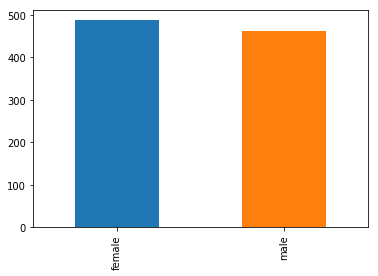

In [6]:
gender_passed_all.plot.bar()

#### From the above bar diagram we can see that more female are passing than male in all subjects but we must also consider that female students were more in number than male students so we cannot excatly say that more female students are passing

### Identifying if parents education effects childrens education or not

In [7]:
all_students_parent_level = df['parental level of education']
all_students_parent_level_count = all_students_parent_level.value_counts()
passed_students_parent_level = passed_all['parental level of education']
passed_students_parent_level_count = passed_students_parent_level.value_counts()
print("All student's Parents Education\n",all_students_parent_level_count,"\n")
print("Passed student's Parents Education\n",passed_students_parent_level_count)

All student's Parents Education
 some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64 

Passed student's Parents Education
 associate's degree    217
some college          216
high school           180
some high school      163
bachelor's degree     114
master's degree        59
Name: parental level of education, dtype: int64


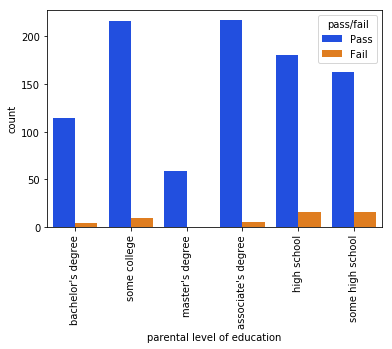

In [8]:
parents_education = sns.countplot(x='parental level of education', data = df, hue='pass/fail', palette='bright')
_ = plt.setp(parents_education.get_xticklabels(), rotation=90) 

#### We can see from the results above that the more number of students whose parents have high degree of education are passing and more number of students are failing whose parents have low degree of education 

### Checking parent education level of students passed and failed in maths

In [9]:
df['math_pass/fail'].value_counts()
#1 represents pass
#0 represents fail

1    960
0     40
Name: math_pass/fail, dtype: int64

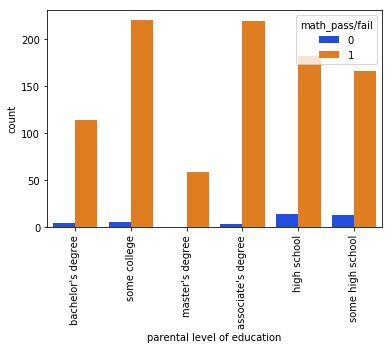

In [10]:
parents_education = sns.countplot(x='parental level of education', data = df, hue='math_pass/fail', palette='bright')
_ = plt.setp(parents_education.get_xticklabels(), rotation=90) 

#### In above bar diagram 1 represents "Pass" and 0 represents "Fail", and we see that students whose parents have high degree of education are less failed in math 

### Checking parent education level of students passed and failed in Reading

In [11]:
df['reading_pass/fail'].value_counts()
#1 represents pass
#0 represents fail

1    974
0     26
Name: reading_pass/fail, dtype: int64

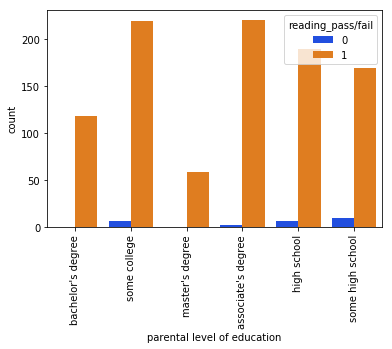

In [12]:
parents_education = sns.countplot(x='parental level of education', data = df, hue='reading_pass/fail', palette='bright')
_ = plt.setp(parents_education.get_xticklabels(), rotation=90) 

#### In above bar diagram 1 represents "Pass" and 0 represents "Fail", and we see that students whose parents have high degree of education are less failed in reading. Students whose parents have master's or bachelor's degree are not at all failed in reading

### Checking parent education level of students passed and failed in Writing

In [13]:
df['writing_pass/fail'].value_counts()
#1 represents pass
#0 represents fail

1    968
0     32
Name: writing_pass/fail, dtype: int64

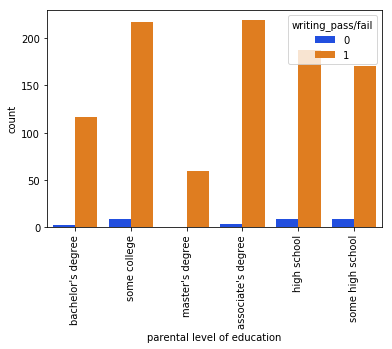

In [14]:
parents_education = sns.countplot(x='parental level of education', data = df, hue='writing_pass/fail', palette='bright')
_ = plt.setp(parents_education.get_xticklabels(), rotation=90) 

#### In above bar diagram 1 represents "Pass" and 0 represents "Fail", and we see that students whose parents have high degree of education are less failed in writing. Students whose parents have master's degree are not at all failed in writing

### Checking the grade of students

In [15]:
df['grade'].value_counts()

First          517
Second         234
Distinction    198
Fail            51
Name: grade, dtype: int64

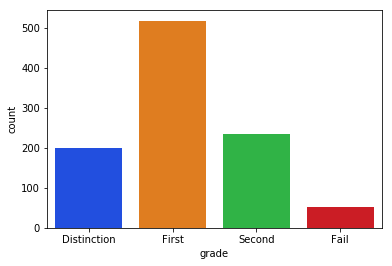

In [16]:
sns.countplot(x="grade", data = df, order=['Distinction','First','Second','Fail'],  palette="bright")
plt.show()

#### From the above bar diagram we see that most of the students have secured first divison then second and distinction and less number of students are failed

### Comparing grade with parental level of education

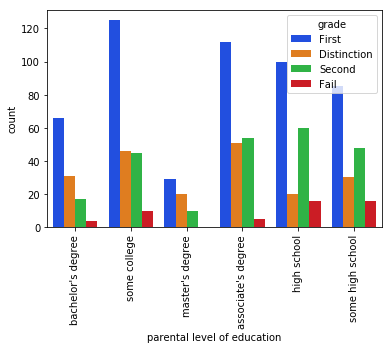

In [17]:
grade_parent_edu = sns.countplot(x='parental level of education', data = df, hue='grade', palette='bright')
_ = plt.setp(grade_parent_edu.get_xticklabels(), rotation=90) 

#### From the above bar diagram we see that more students whose parents have some high school and high school degree are failed. There is not a single student failed whose parents have master's degree

### Comparing grade with gender

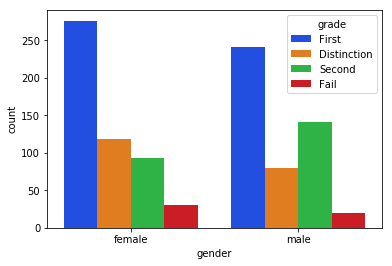

In [18]:
grade_parent_edu = sns.countplot(x='gender', data = df, hue='grade', palette='bright')
_ = plt.setp(grade_parent_edu.get_xticklabels(), rotation=0) 

#### From the above bar diagram we see that more female have secured Distinction and First Division than male students and more female students are also failed than male students.

### Writing Vs Math Score 

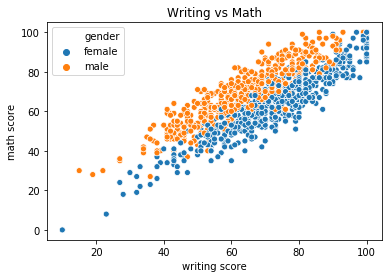

In [19]:
sns.scatterplot(x="writing score", y="math score", data=df, hue="gender")
plt.title("Writing vs Math")
plt.show()

### Math Vs Reading Score

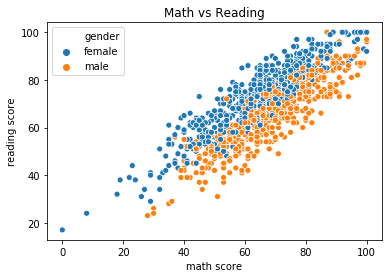

In [20]:
sns.scatterplot(x="math score", y="reading score", data=df, hue="gender")
plt.title("Math vs Reading")
plt.show()

### Reading Vs Writing Score

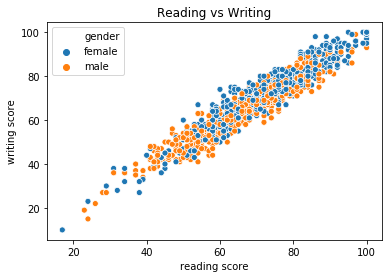

In [21]:
sns.scatterplot(x="reading score", y="writing score", data=df, hue="gender")
plt.title("Reading vs Writing")
plt.show()

### Checking the distributions of the scores achieved in each exam.

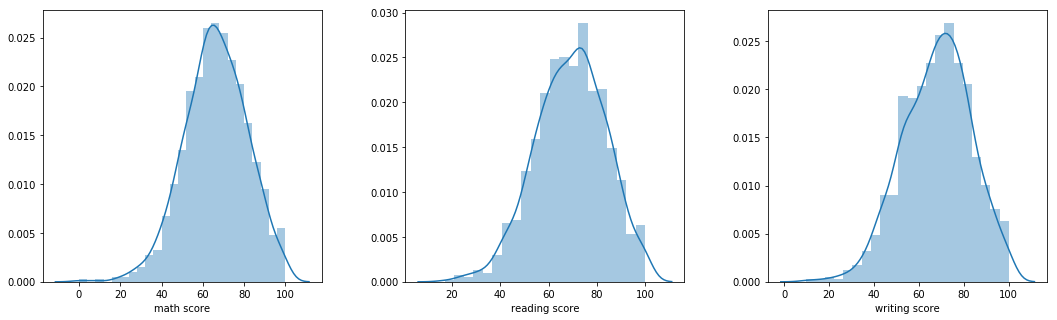

In [22]:
fig, axs = plt.subplots(figsize=(18,5), ncols=3)
fig.subplots_adjust(wspace=0.3)

sns.distplot(df['math score'], ax=axs[0])
sns.distplot(df['reading score'], ax=axs[1])
sns.distplot(df['writing score'], ax=axs[2])

### Using a boxplot to compare how much of an impact the test preparation course had for each subject

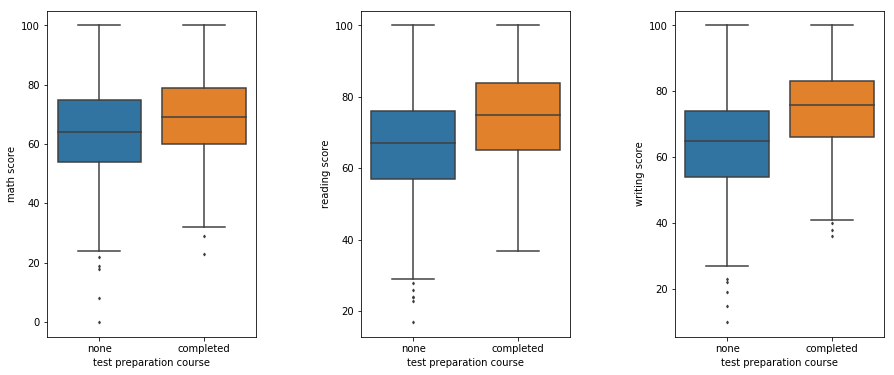

In [23]:
fig, axs = plt.subplots(figsize=(15,6), ncols=3)
fig.subplots_adjust(wspace=0.5)

sns.boxplot(x='test preparation course', y='math score', data=df, ax=axs[0], fliersize=2)
sns.boxplot(x='test preparation course', y='reading score', data=df, ax=axs[1], fliersize=2)
sns.boxplot(x='test preparation course', y='writing score', data=df, ax=axs[2], fliersize=2)

#### Overall it seems that the test-preparation exam was effective revision for every subject, most affecting the scores in the writing exam.

### Identifying if race/ethnicity effects students education or not

In [24]:
students_ethnicity=passed_all['race/ethnicity']
students_ethnicity_count=students_ethnicity.value_counts()
students_ethnicity_count

group C    301
group D    252
group B    177
group E    136
group A     83
Name: race/ethnicity, dtype: int64

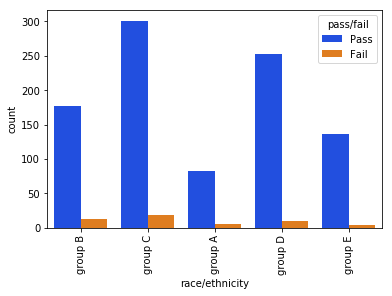

In [25]:
race_pass = sns.countplot(x='race/ethnicity', data = df, hue='pass/fail', palette='bright')
_ = plt.setp(race_pass.get_xticklabels(), rotation=90) 

#### From the above bar diagram we can see that students belonging to ethnicity group A has least passed students and group C has most passed and failed students whereas group E has least failed students

### Comparing race/ethnicity with grade of students

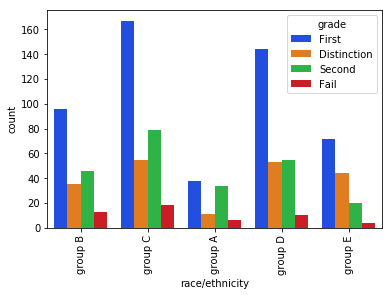

In [26]:
race_grade = sns.countplot(x='race/ethnicity', data = df, hue='grade', palette='bright')
_ = plt.setp(race_grade.get_xticklabels(), rotation=90) 

#### From the above bar diagram we see that group C has more students with Distinction, First & Second Division and Fail

### Comparing race/ethnicity with lunch of students

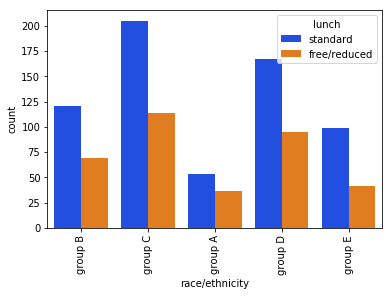

In [27]:
race_lunch = sns.countplot(x='race/ethnicity', data = df, hue='lunch', palette='bright')
_ = plt.setp(race_lunch.get_xticklabels(), rotation=90) 

#### From the above bar diagram we see that students belonging to group C has more standard and free/reuced lunch

### Comparing race/ethnicity  with test preparation course

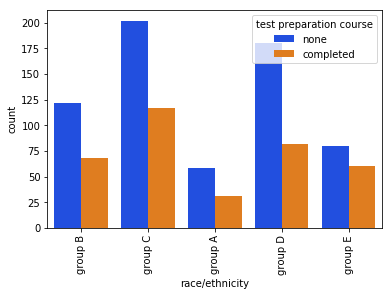

In [28]:
race_test = sns.countplot(x='race/ethnicity', data = df, hue='test preparation course', palette='bright')
_ = plt.setp(race_test.get_xticklabels(), rotation=90)

#### From the above bar diagram we see that more students belonging to group C and D has none of the test preparation course 

### Identifying lunch of passed students

In [29]:
student_lunch=passed_all['lunch']
student_lunch_count=student_lunch.value_counts()
student_lunch_count

standard        633
free/reduced    316
Name: lunch, dtype: int64

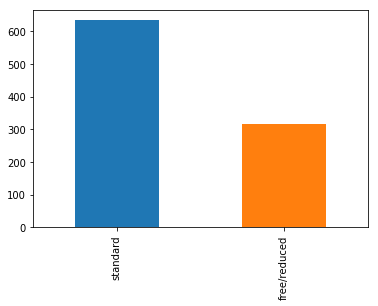

In [30]:
student_lunch_count.plot.bar()

#### From the above bar diagram we can see that students who have standard lunch are more passed in all subject in comparison to the students who have free/reduced lunch

### Comparing lunch with pass/fail

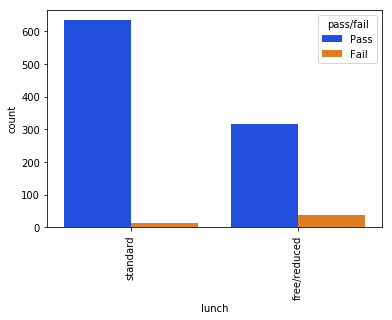

In [31]:
race_test = sns.countplot(x='lunch', data = df, hue='pass/fail', palette='bright')
_ = plt.setp(race_test.get_xticklabels(), rotation=90)

#### From the above diagram we see that less number of students who have standard lunch are failed

### Comparing lunch with grade of students

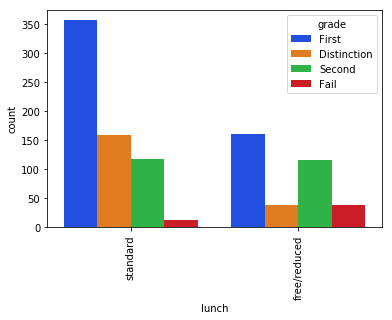

In [32]:
lunch_grade = sns.countplot(x='lunch', data = df, hue='grade', palette='bright')
_ = plt.setp(lunch_grade.get_xticklabels(), rotation=90)

#### From the above bar daigram we see that students who have standard lunch have secured better grade 

### Comparing test preparartion course with pass/fail

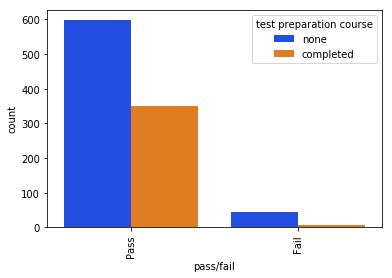

In [33]:
pass_test = sns.countplot(x='pass/fail', data = df, hue='test preparation course', palette='bright')
_ = plt.setp(pass_test.get_xticklabels(), rotation=90)

#### From the above bar diagram we see that sudents who have completed test preparation course are less failed

### Comparing lunch with test preparation course

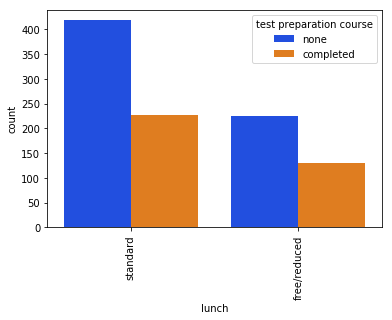

In [34]:
lunch_test = sns.countplot(x='lunch', data = df, hue='test preparation course', palette='bright')
_ = plt.setp(lunch_test.get_xticklabels(), rotation=90)

#### From the above bar diagram we see that most of the students have none of the test preparation course and students who have standard lunch have more number of students who have completed test preparation course

### Comparing test prepration cousre with parental education level

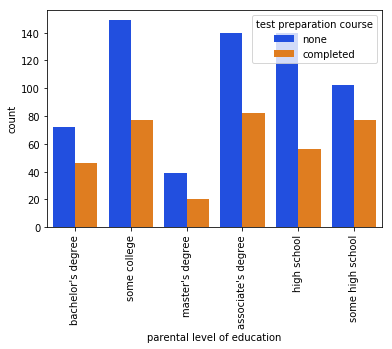

In [35]:
test_parent = sns.countplot(x='parental level of education', data = df, hue='test preparation course', palette='bright')
_ = plt.setp(test_parent.get_xticklabels(), rotation=90)

#### Form the above bar diagram we see that most of the students have none of the test preparation course regardless of their parent's education level

### Identifying test preparation course of passed students

In [36]:
student_test_preparation_course=passed_all['test preparation course']
student_test_preparation_course_count=student_test_preparation_course.value_counts()
student_test_preparation_course_count

none         598
completed    351
Name: test preparation course, dtype: int64

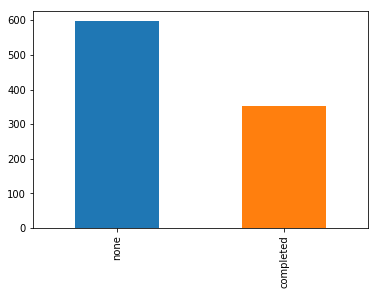

In [37]:
student_test_preparation_course_count.plot.bar()

#### From the above bar daigram we can see that more students who dosent have any test preparation cousre are passed in all subjects than the ones who have completed the test preparation course

### Finding the number of failed students in all subjects

In [38]:
fail_math=df[df['math score']<40]
fail_math_reading=fail_math[fail_math['reading score']<40]
fail_all=fail_math_reading[fail_math_reading['writing score']<40]
print("Students Failed in all subjects:",len(fail_all))

Students Failed in all subjects: 18


In [39]:
fail_female=fail_all[fail_all['gender_mapped']==1]
print("Total failed Female students in all subjects:",len(fail_female))
fail_male=fail_all[fail_all['gender_mapped']==2]
print("Total failed Male students in all subjects:",len(fail_male))

Total failed Female students in all subjects: 11
Total failed Male students in all subjects: 7


#### From above result we see that more female students are failing in all subject

### Total Failed Students

In [40]:
total_fail=df[df['pass/fail']=='Fail']
print("Total Students Failed:",len(total_fail))

Total Students Failed: 51


### Finding the number of male and female students failed in any subjects

In [41]:
total_fail_male=total_fail[total_fail['gender_mapped']==2]
print("Total failed Male students:",len(total_fail_male))
total_fail_female=total_fail[total_fail['gender_mapped']==1]
print("Total failed Female students:",len(total_fail_female))

Total failed Male students: 20
Total failed Female students: 31


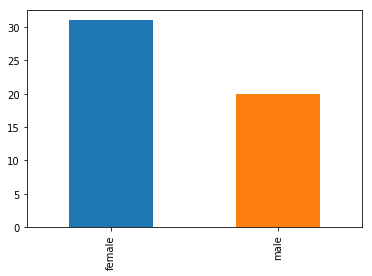

In [42]:
total_fail1=total_fail['gender']
total_fail_count=total_fail1.value_counts()
total_fail_count.plot.bar()

#### From the above bar diagram we can see that more female are failed in comparision  to male students

### Finding the ethnicity of total failed students

In [43]:
total_fail_race=total_fail['race/ethnicity']
total_fail_race_count=total_fail_race.value_counts()
total_fail_race_count

group C    18
group B    13
group D    10
group A     6
group E     4
Name: race/ethnicity, dtype: int64

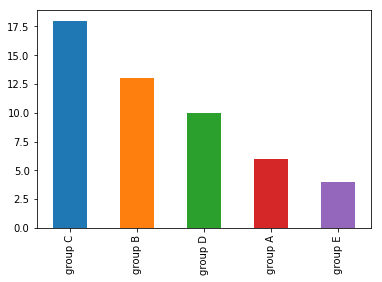

In [44]:
total_fail_race_count.plot.bar()

#### From the above bar diagram we see that more students of race/ethnicity group C are failing and less students of group E are failing

### Finding the number of failed students in each subject

In [45]:
fail_math=df[df['math_pass/fail']==0]
fail_reading=df[df['reading_pass/fail']==0]
fail_writing=df[df['writing_pass/fail']==0]
print("Total Students failed in maths",len(fail_math))
print("Total Students failed in reading",len(fail_reading))
print("Total Students failed in writing",len(fail_writing))

Total Students failed in maths 40
Total Students failed in reading 26
Total Students failed in writing 32


#### From above result we can see that more students are failed in maths and less number of students are failed in reading

### Finding the lunch of student failed in all subjects

In [46]:
fail_all_lunch=fail_all['lunch']
fail_all_lunch_count=fail_all_lunch.value_counts()
fail_all_lunch_count

free/reduced    15
standard         3
Name: lunch, dtype: int64

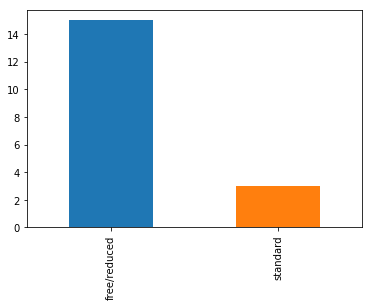

In [47]:
fail_all_lunch_count.plot.bar()

#### From above bar diagram we see that more students who have free/reduced lunch are in all subjects than students who have standard lunch

### Finding the test preparation course of students failed in all subjects

In [48]:
fail_all_course=fail_all['test preparation course']
fail_all_course_count=fail_all_course.value_counts()
fail_all_course_count

none    18
Name: test preparation course, dtype: int64

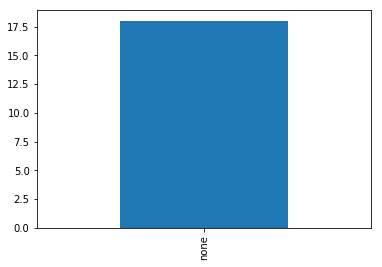

In [49]:
fail_all_course_count.plot.bar()

#### From above bar diagram we see that all of the students failed have none of the test preparation course

### Checking number of students who secured Distinction

In [50]:
distinction=df[df['grade']=="Distinction"]
print("Total students who secured distinction:",len(distinction))

Total students who secured distinction: 198


### Checking whether more female or male students have secured distinction

In [51]:
dist_gender=distinction['gender']
dist_gender_count=dist_gender.value_counts()
dist_gender_count

female    118
male       80
Name: gender, dtype: int64

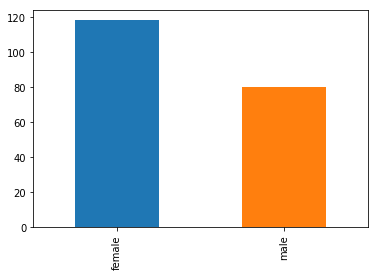

In [52]:
dist_gender_count.plot.bar()

#### From the above bar diagram we see that more female have secured distinction than male students

### Checking the number of students who secured First Division

In [53]:
first=df[df['grade']=="First"]
print("Total students securing first division:",len(first))

Total students securing first division: 517


### Checking whether more female or male students have secured First Division

In [54]:
first_gen=first['gender']
first_gen_count=first_gen.value_counts()
first_gen_count

female    276
male      241
Name: gender, dtype: int64

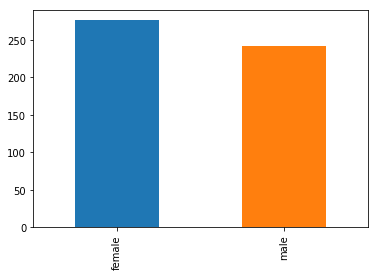

In [55]:
first_gen_count.plot.bar()

#### From the above bar diagram we see that more female have secured First Division than male students

### Checking the number of students who secured Second Division

In [56]:
second=df[df['grade']=="Second"]
print("Total students securing second division:",len(second))

Total students securing second division: 234


### Checking whether more female or male students have secured Second Division

In [57]:
second_gen=second['gender']
second_gen_count=second_gen.value_counts()
second_gen_count

male      141
female     93
Name: gender, dtype: int64

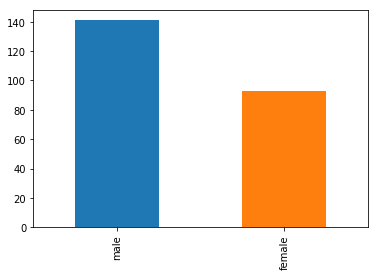

In [58]:
second_gen_count.plot.bar()

#### From the above bar diagram we see that more male students have secured second division than female students